This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/6_clustering/)

# KMEANS basics 
The purpose of this lab is to implement simple 1D Kmeans clustering algorithm, and compare the obtained results with those obtained using skleran implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

## import data from matlab file : 

In [2]:
Data=loadmat('fictitious_train.mat')
print(Data.keys())
X=Data.get('Xtrain')
print('dim of X:{}'.format(X.shape))

dict_keys(['__header__', '__version__', '__globals__', 'Xtrain'])
dim of X:(20, 1)


## Compute the histogram

In [3]:
bins=np.arange(np.min(X)-1,np.max(X)+2,1)
hist_val,bins=np.histogram(X, bins=bins)
print(hist_val)
print(bins)

[0 4 2 5 1 4 3 1 0]
[-1.39 -0.39  0.61  1.61  2.61  3.61  4.61  5.61  6.61  7.61]


### or directly visualize the histogram 

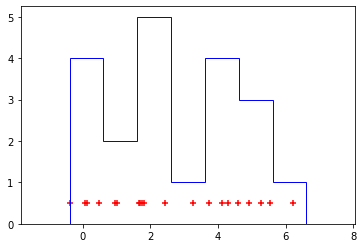

In [4]:
bins=np.arange(np.min(X)-1,np.max(X)+2,1)
plt.scatter(X,np.zeros_like(X)+.5,c='red',marker='+')
n,bin_edges,patches=plt.hist(x=X,bins=bins, color='blue',histtype='step')

## Implementation of Kmean on a simple case
In this example, the number of clusters is assumed to be known. 

### Exercize :
- Explain/ comment the code below
- What is the main problem left aside by this code? 

In [5]:
K=2 #nb of clusters 
p=1 # dimension (the code below is given for p=1 only)


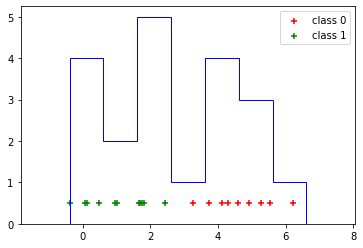

In [6]:
N=X.size
idx=np.zeros((N,1))
muvec=np.zeros((K,1)) 


change = True
perm=np.random.permutation(N)[0:2]

for k in range (0,K): 
    muvec[k] = X[perm[k],:]

for i in range (0,N):
    d=(X[i] - muvec )**2
    idx[i]=np.where(d==d.min())[0]
    
while change:
    change=False
    #update
    for k in range (0,K):
        muvec[k]= np.mean( X[idx == k] ) 
    #prediction
    for i in range (0,N):
        d=(X[i] - muvec )**2
        index=np.where(d==d.min())[0]
        if index != idx[i]:
            change=True
            idx[i]=index
            
X0=X[idx==0]
X1=X[idx==1]
bins=np.arange(np.min(X)-1,np.max(X)+2,1)
n,bin_edges,patches=plt.hist(x=X,bins=bins, color='blue',histtype='step')
plt.scatter(X0,np.zeros_like(X0)+.5,c='red',marker='+', label='class 0')
plt.scatter(X1,np.zeros_like(X1)+.5,c='green',marker='+',label='class 1')
plt.legend()
h=plt.gcf()

### sklearn implementation - exercize
- Compare the results obtained with the simple code above
- Comment and explain the role of the iput parameters used in this implementation


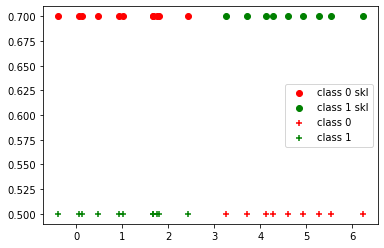

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 10, n_init = 10, random_state = 0)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

Y0=X[y_kmeans==0]
Y1=X[y_kmeans==1]
plt.scatter(Y0,np.zeros_like(Y0)+.7,c='red',marker='o', label='class 0 skl')
plt.scatter(Y1,np.zeros_like(Y1)+.7,c='green',marker='o',label='class 1 skl')
plt.scatter(X0,np.zeros_like(X0)+.5,c='red',marker='+', label='class 0')
plt.scatter(X1,np.zeros_like(X1)+.5,c='green',marker='+',label='class 1')
plt.legend()